# Tesla stock price prediction - LSTM
#### 1. inputs data is the last 60 data of train data plus true test data
#### 2. inputs data is the last 60 data of train data only (not used true test data)

### RNNs
RNNs are a type of neural network that is used for sequential data, such as time series or text. They are characterized by their ability to take in a sequence of inputs and produce a sequence of outputs, while maintaining a "memory" of past inputs. However, traditional RNNs suffer from the vanishing gradient problem, which occurs when the gradient of the loss function with respect to the weights becomes too small, making it difficult to learn long-term dependencies in the data.
### LSTM
LSTM stands for Long Short-Term Memory, and it is a type of Recurrent Neural Network (RNN) architecture that is designed to better handle the vanishing gradient problem that arises in traditional RNNs.
### The vanishing gradient problem
The vanishing gradient problem is a phenomenon that can occur during the training of neural networks, particularly deep neural networks with many layers. During backpropagation, the gradients of the loss function with respect to the weights in the earlier layers of the network can become extremely small, which means that the weights in these layers are updated very slowly or not at all.


In [238]:
!pip install mpl_finance

In [239]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [240]:
from tensorflow.python.client import device_lib

def check_gpu():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(check_gpu())

['/device:GPU:0']


In [241]:
dataset = pd.read_csv("/content/TSLA.csv")
print(len(dataset))

639


In [242]:
print(dataset.columns.tolist())
#dataset.columns=[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close']]

['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']


In [243]:
df = dataset #So that I don't accidentally mess up the original dataset.

##Time-Seris Plot

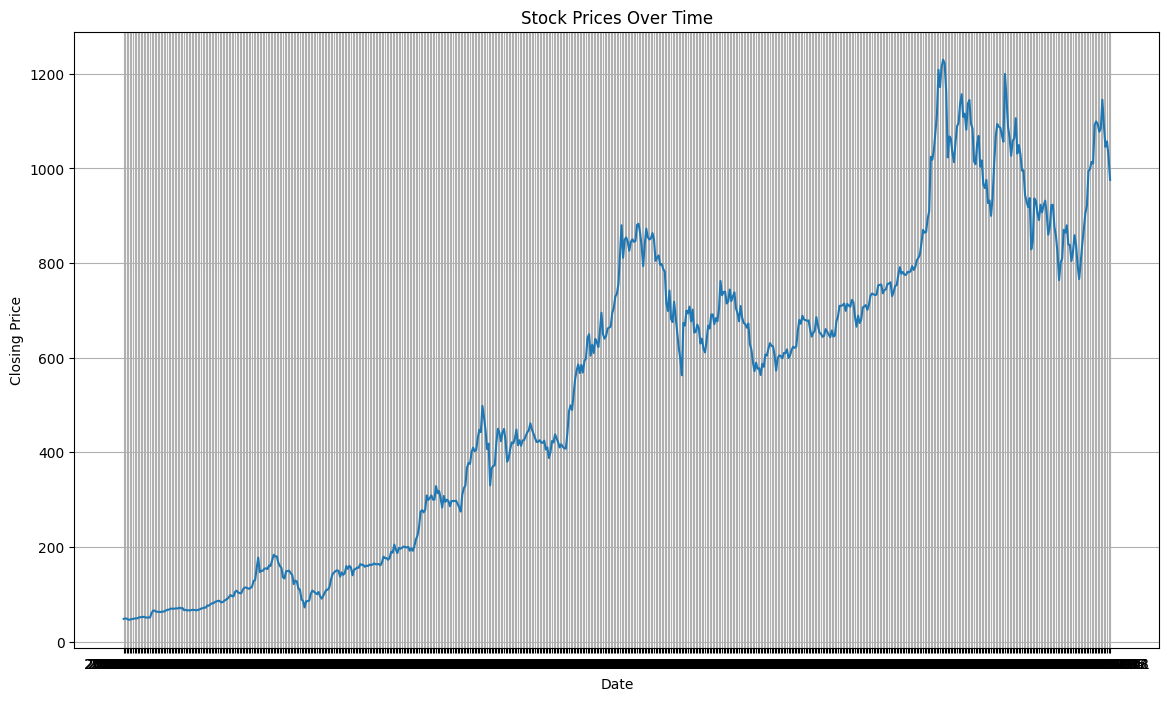

In [244]:

plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'])
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid()
plt.show()


##Candlestick Plot

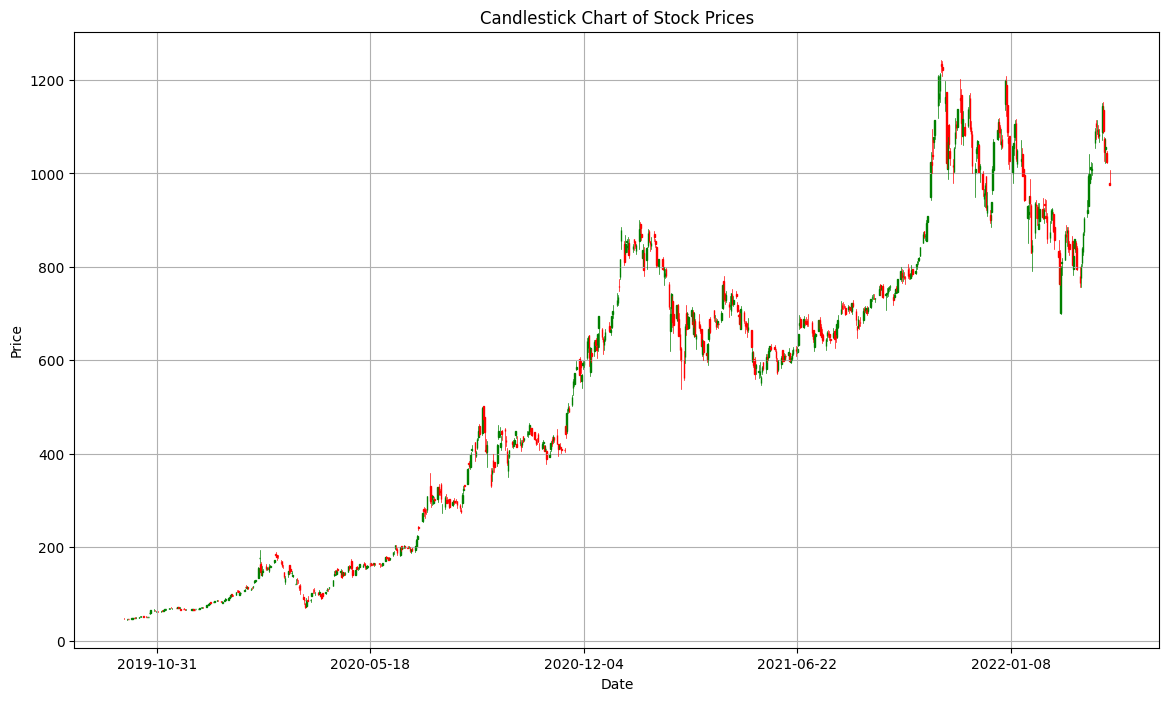

In [245]:
fig, ax = plt.subplots(figsize=(14, 8))
candlestick_ohlc(ax, zip(mdates.date2num(df['Date']), df['Open'], df['High'], df['Low'], df['Close']), width=0.6, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_title('Candlestick Chart of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()


##Moving Average Plot

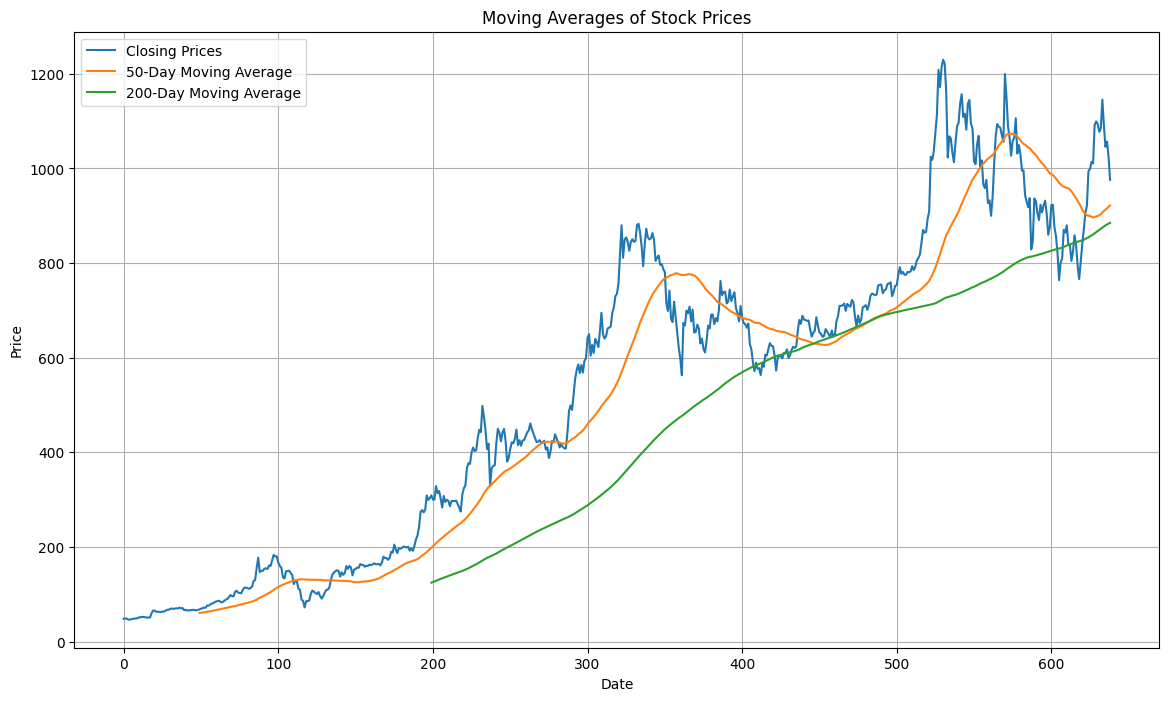

In [246]:


plt.figure(figsize=(14, 8))
df['Close'].plot(label='Closing Prices')
df['Close'].rolling(window=50).mean().plot(label='50-Day Moving Average')
df['Close'].rolling(window=200).mean().plot(label='200-Day Moving Average')
plt.title('Moving Averages of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [247]:
#Column to use
Column_Name = 'Adj Close'
Column_Number = dataset.columns.get_loc(Column_Name)

In [248]:
test_size = 80
dataset_train=dataset.iloc[:-test_size]
dataset_test=dataset.iloc[-test_size:]

# dataset_train

In [249]:
trainset = dataset_train.iloc[:,Column_Number].values #Volume
trainset = trainset.reshape(trainset.shape[0],1)
display(trainset[0:5])

array([[48.17399979],
       [48.93799973],
       [48.62599945],
       [46.60599899],
       [46.2859993 ]])

## MinMaxScaler
MinMaxScaler is used to scale the values of data to a range of 0 to 1.

In [250]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.0015951 ]
 [0.00224058]
 [0.00197698]
 [0.00027036]
 [0.        ]]
559


In [251]:
x_train = []
y_train = []

In [252]:
# training_scaled

* x_train is data during the past 60 days.
* y_data is the data of the day after the last day of x_train

In [253]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
    # print(x_train,y_train)
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(499, 60) (499,)


In [254]:
# x_train

This code is reshaping the input data x_train into a 3D tensor with dimensions (samples, time steps, features) which is required as input for a Long Short-Term Memory (LSTM) neural network.

The reshaping step is necessary because LSTMs require input data to be in a specific format, where:

* samples refers to the number of input sequences (or samples) in the dataset
* time steps refers to the number of time steps in each input sequence
* features refers to the number of features (or variables) in each time step of the input sequence


In [255]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (499, 60, 1)


In [278]:
regressor = Sequential()
regressor.add(LSTM(units = 150,return_sequences = True,input_shape = (x_train.shape[1],1)))#x_train.shape[1]=60, since we are using 60 time step, making are LSTM distributed to 60 units in each step.
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 25))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [279]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
history = regressor.fit(x_train,y_train,epochs =300, batch_size = 32,verbose=1)

Epoch 1/300
16/16 [==============================] - 6s 20ms/step - loss: 0.0507
Epoch 2/300
16/16 [==============================] - 0s 14ms/step - loss: 0.0118
Epoch 3/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0088
Epoch 4/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 5/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0065
Epoch 6/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0054
Epoch 7/300
16/16 [==============================] - 0s 14ms/step - loss: 0.0057
Epoch 8/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0053
Epoch 9/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 10/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0054
Epoch 11/300
16/16 [==============================] - 0s 14ms/step - loss: 0.0051
Epoch 12/300
16/16 [==============================] - 0s 20ms/step - loss: 0.0057
Epoch 13/300
16/16 [=====

# dataset_test

In [280]:
real_stock_price = dataset_test.iloc[:,Column_Number].values
real_stock_price = real_stock_price.reshape(real_stock_price.shape[0],1)
dataset_total = pd.concat((dataset_train[Column_Name],dataset_test[Column_Name]),axis = 0)

## 1. inputs data is the last 60 data of train data plus true test data

In [281]:
print(len(dataset_total),len(dataset_test))
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
print(inputs.shape)
print(inputs)

639 80
(140,)
[ 751.94000244  753.64001465  774.39001465  791.35998535  777.55999756
  781.30999756  775.47998047  775.2199707   781.5300293   780.59002686
  782.75        793.60998535  785.48999023  791.94000244  805.7199707
  811.08001709  818.32000732  843.0300293   870.10998535  864.27001953
  865.79998779  894.          909.67999268 1024.85998535 1018.42999268
 1037.85998535 1077.04003906 1114.         1208.58996582 1172.
 1213.85998535 1229.91003418 1222.08996582 1162.93994141 1023.5
 1067.94995117 1063.51000977 1033.42004395 1013.39001465 1054.72998047
 1089.01000977 1096.38000488 1137.06005859 1156.86999512 1109.0300293
 1116.         1081.92004395 1136.98999023 1144.76000977 1095.
 1084.59997559 1014.9699707  1009.01000977 1051.75       1068.95996094
 1003.79998779 1017.0300293   966.40997314  958.51000977  975.98999023
  926.91998291  932.57000732  899.94000244  938.5300293  1008.86999512
 1067.         1093.93994141 1088.4699707  1086.18994141 1070.33996582
 1056.7800293  11

In the context of a LSTM model, this reshaping may be necessary if the input data has only one feature (i.e., one time series) and the LSTM model expects a 3D input shape of (n_samples, n_time_steps, n_features). In this case, since there is only one feature, the shape does not change.

In [282]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)
print(inputs)

(140, 1)
(140, 1)
[[0.59618087]
 [0.59761714]
 [0.61514805]
 [0.62948535]
 [0.61782625]
 [0.62099449]
 [0.61606892]
 [0.61584925]
 [0.62118038]
 [0.62038621]
 [0.62221109]
 [0.63138629]
 [0.62452601]
 [0.62997538]
 [0.64161757]
 [0.64614607]
 [0.65226287]
 [0.67313945]
 [0.6960183 ]
 [0.69108433]
 [0.69237694]
 [0.71620208]
 [0.72944953]
 [0.82676083]
 [0.82132837]
 [0.83774404]
 [0.87084582]
 [0.90207192]
 [0.98198747]
 [0.95107396]
 [0.98643991]
 [1.        ]
 [0.99339311]
 [0.94341946]
 [0.82561183]
 [0.86316594]
 [0.8594148 ]
 [0.8339929 ]
 [0.81707027]
 [0.85199688]
 [0.8809588 ]
 [0.88718544]
 [0.9215545 ]
 [0.93829118]
 [0.89787297]
 [0.90376164]
 [0.87496875]
 [0.9214953 ]
 [0.92805991]
 [0.88601952]
 [0.87723293]
 [0.81840512]
 [0.81336977]
 [0.8494792 ]
 [0.86401926]
 [0.80896802]
 [0.82014559]
 [0.77737858]
 [0.7707042 ]
 [0.78547238]
 [0.74401496]
 [0.74878845]
 [0.72122057]
 [0.75382385]
 [0.81325148]
 [0.86236336]
 [0.88512392]
 [0.88050254]
 [0.87857623]
 [0.86518517]
 [

In [283]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))# 1 since number of features is 1
print(x_test.shape)
print((sc.inverse_transform(x_test.reshape(-1,1))))

(80, 60)
(80, 60, 1)
[[ 751.94000244]
 [ 753.64001465]
 [ 774.39001465]
 ...
 [1045.76000977]
 [1057.26000977]
 [1025.48999023]]


In [284]:
predicted_price = regressor.predict(x_test)

3/3 [==============================] - 2s 10ms/step


In [285]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(80, 1)


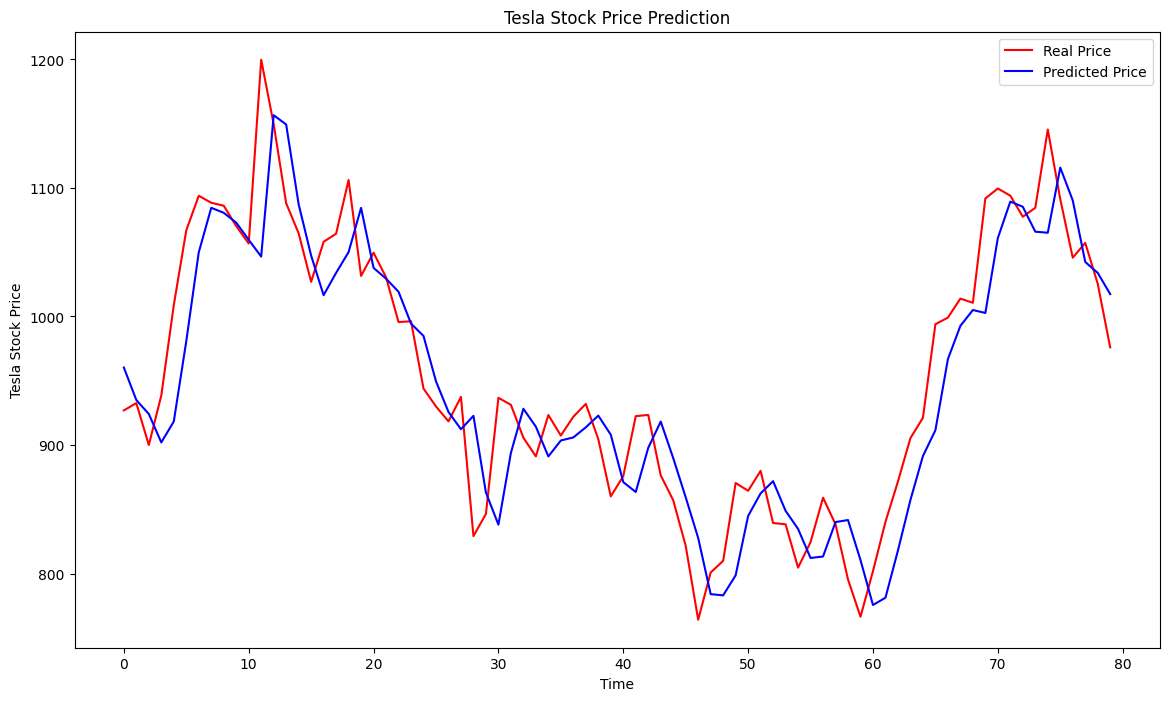

In [286]:
plt.figure(figsize=(14,8))
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

## 2. inputs data is the last 60 data of train data only (not use true test data)

In [287]:
inputs = np.array(dataset_train[Column_Name][-60:])
new_predicted_price=[]
for i in range(test_size):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x,verbose=0)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

In [288]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(80, 1)


In [289]:
dataset.iloc[-1,Column_Number]#Rough

975.9299926757812

In [290]:
predicted_price[-1]#Rough

array([1017.4045], dtype=float32)

In [291]:
# plt.plot(real_stock_price,color = 'red', label = 'Real Price')
# plt.plot(new_predicted_price, color = 'blue', label = 'New Predicted Price')
# plt.title('Tesla Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Tesla Stock Price')
# plt.legend()
# plt.show()

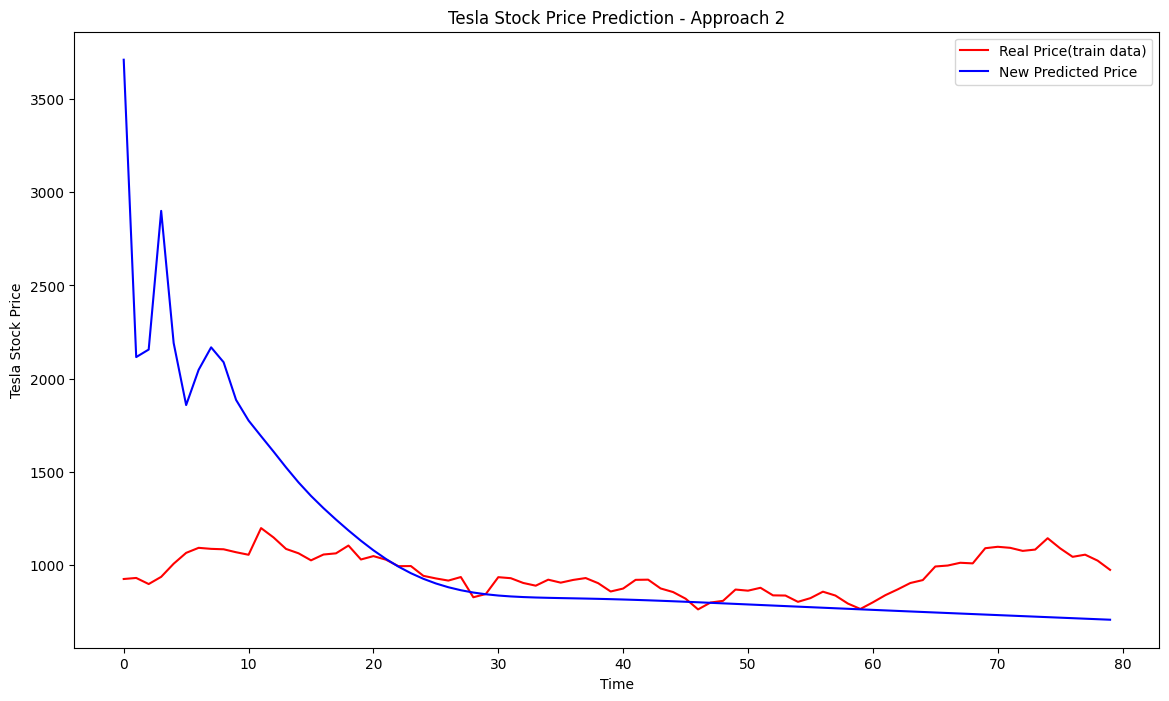

In [292]:
plt.figure(figsize=(14, 8))
plt.plot(real_stock_price[:len(new_predicted_price)], color='red', label='Real Price(train data)')
plt.plot(new_predicted_price, color='blue', label='New Predicted Price')
plt.title('Tesla Stock Price Prediction - Approach 2')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [293]:
dataset.iloc[-1,Column_Number]#Rough

975.9299926757812

In [294]:
new_predicted_price[-1]#Rough

array([708.71564], dtype=float32)

In [295]:
print(new_predicted_price.shape)#Rough

(80, 1)


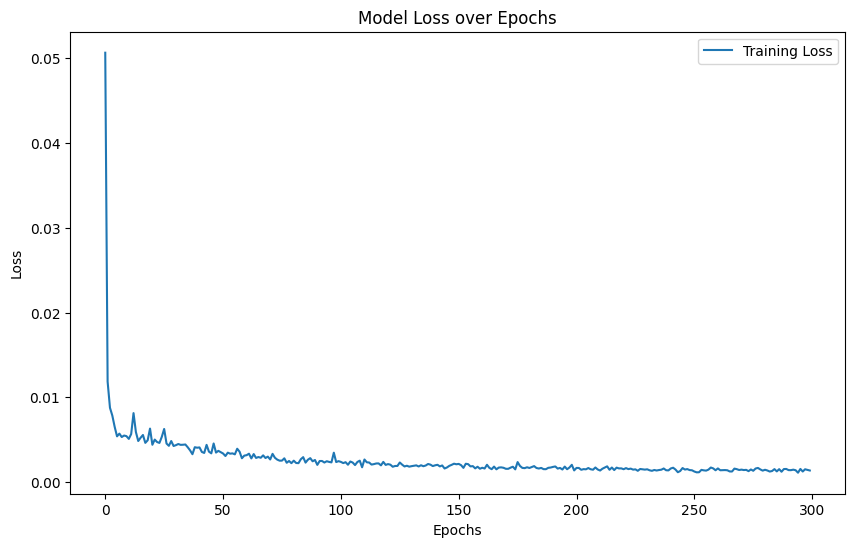

In [297]:
# Plotting the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#ROUGH

In [ ]:
# Assuming 'input_date' is the date for which you want to make the prediction
input_date = '2015-06-19'  # Replace this with your desired date

# Locate the corresponding data points preceding the date for the input sequence
input_sequence = dataset.loc[dataset['Date'] < input_date, 'Adj Close'].values[-60:]
input_sequence = input_sequence.reshape(1, 60, 1)  # Reshape to match the input shape of the LSTM model

# Use the model to predict the stock price for the specified date
predicted_price = regressor.predict(input_sequence)
predicted_price = sc.inverse_transform(predicted_price)

print("Predicted price for the date {}: {}".format(input_date, predicted_price))


In [ ]:
from datetime import datetime, timedelta

# Define the last date of the dataset and the number of days to predict
last_date = '2022-04-11'
num_days_to_predict = 100

# Convert the last date to a datetime object
last_date_dt = datetime.strptime(last_date, '%Y-%m-%d')

# Predict stock prices for 10 days after the last date in the dataset
for i in range(num_days_to_predict):
    # Convert the last date to the required format
    input_date = (last_date_dt + timedelta(days=i)).strftime('%Y-%m-%d')

    # Locate the corresponding data points preceding the date for the input sequence
    input_sequence = dataset.loc[dataset['Date'] < input_date, 'Adj Close'].values[-60:]
    input_sequence = input_sequence.reshape(1, 60, 1)  # Reshape to match the input shape of the LSTM model

    # Use the model to predict the stock price for the specified date
    predicted_price = regressor.predict(input_sequence)
    predicted_price = sc.inverse_transform(predicted_price)

    # Append the predicted price to the DataFrame 'df'
    df = df.append({'Date': input_date, 'Close': predicted_price[0][0]}, ignore_index=True)

# Convert the 'Date' column to datetime format for plotting
df['Date'] = pd.to_datetime(df['Date'])

# Plot the time series with a vertical line at '2022-04-11'
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'], label='Predicted Prices', color='green')
# plt.axvline(x=last_date, color='r', linestyle='--', label='Last Date in Dataset')
plt.title('Tesla Stock Price Prediction for 100 Days after Last Date')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()
